- 1stFlrSF:	 First Floor square feet
- 2ndFlrSF:	 Second floor square feet
- 3SsnPorch:	 Three season porch area in square feet
- Alley:	 Type of alley access
- Bedroom:	 Number of bedrooms above basement level
- BldgType:	 Type of dwelling
- BsmtCond:	 General condition of the basement
- BsmtExposure:	 Walkout or garden level basement walls
- BsmtFinSF1:	 Type 1 finished square feet
- BsmtFinSF2:	 Type 2 finished square feet
- BsmtFinType1:	 Quality of basement finished area
- BsmtFinType2:	 Quality of second finished area (if present)
- BsmtFullBath:	 Basement full bathrooms
- BsmtHalfBath:	 Basement half bathrooms
- BsmtQual:	 Height of the basement
- BsmtUnfSF:	 Unfinished square feet of basement area
- CentralAir:	 Central air conditioning
- Condition1:	 Proximity to main road or railroad
- Condition2:	 Proximity to main road or railroad (if a second is present)
- Electrical:	 Electrical system
- EnclosedPorch:	 Enclosed porch area in square feet
- ExterCond:	 Present condition of the material on the exterior
- Exterior1st:	 Exterior covering on house
- Exterior2nd:	 Exterior covering on house (if more than one material)
- ExterQual:	 Exterior material quality
- Fence:	 Fence quality
- FireplaceQu:	 Fireplace quality
- Fireplaces:	 Number of fireplaces
- Foundation:	 Type of foundation
- FullBath:	 Full bathrooms above grade
- Functional:	 Home functionality rating
- GarageArea:	 Size of garage in square feet
- GarageCars:	 Size of garage in car capacity
- GarageCond:	 Garage condition
- GarageFinish:	 Interior finish of the garage
- GarageQual:	 Garage quality
- GarageType:	 Garage location
- GarageYrBlt:	 Year garage was built
- GrLivArea:	 Above grade (ground) living area square feet
- HalfBath:	 Half baths above grade
- - Heating:	 Type of heating
- HeatingQC:	 Heating quality and condition
- HouseStyle:	 Style of dwelling
- Id:	Observation Id
- Kitchen:	 Number of kitchens
- KitchenQual:	 Kitchen quality
- LandContour:	 Flatness of the property
- LandSlope:	 Slope of property
- LotArea:	 Lot size in square feet
- LotConfig:	 Lot configuration
- LotFrontage:	 Linear feet of street connected to property
- LotShape:	 General shape of property
- LowQualFinSF:	 Low quality finished square feet (all floors)
- MasVnrArea:	 Masonry veneer area in square feet
- MasVnrType:	 Masonry veneer type
- MiscFeature:	 Miscellaneous feature not covered in other categories
- MiscVal:	 $Value of miscellaneous feature
- MoSold:	 Month Sold
- MSSubClass:	 The building class
- MSZoning:	 The general zoning classification
- Neighborhood:	 Physical locations within Ames city limits
- OpenPorchSF:	 Open porch area in square feet
- OverallCond:	 Overall condition rating
- OverallQual:	 Overall material and finish quality
- PavedDrive:	 Paved driveway
- PoolArea:	 Pool area in square feet
- PoolQC:	 Pool quality
- RoofMatl:	 Roof material
- RoofStyle:	 Type of roof
- SaleCondition:	 Condition of sale
- SalePrice:	 the property's sale price in dollars. This is the target variable that you're trying to predict.
- SaleType:	 Type of sale
- ScreenPorch:	 Screen porch area in square feet
- Street:	 Type of road access
- TotalBsmtSF:	 Total square feet of basement area
- TotRmsAbvGrd:	 Total rooms above grade (does not include bathrooms)
- Utilities:	 Type of utilities available
- WoodDeckSF:	 Wood deck area in square feet
- YearBuilt:	 Original construction date
- YearRemodAdd:	 Remodel date
- YrSold:	 Year Sold


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from scipy.stats import norm


from sklearn.preprocessing import StandardScaler
from sklearn import ensemble, tree, linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score



import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')

In [3]:
from IPython.display import display
pd.options.display.max_columns=None
df=df.reindex_axis(sorted(df.columns),axis=1)
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706,0,GLQ,Unf,1,0,Gd,150,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548,2,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500,WD,0,Pave,8,856,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978,0,ALQ,Unf,0,1,Gd,284,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460,2,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500,WD,0,Pave,6,1262,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486,0,GLQ,Unf,1,0,Gd,434,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608,2,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,223500,WD,0,Pave,6,920,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216,0,ALQ,Unf,1,0,TA,540,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642,3,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,140000,WD,0,Pave,7,756,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655,0,GLQ,Unf,1,0,Gd,490,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836,3,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,250000,WD,0,Pave,9,1145,AllPub,192,2000,2000,2008


In [4]:
df.shape

(1460, 81)

### Remove "Id" from dataset

In [5]:
df=df.drop(columns=['Id'])

In [6]:
df.shape

(1460, 80)

## Log Transformation of "SalePrice'

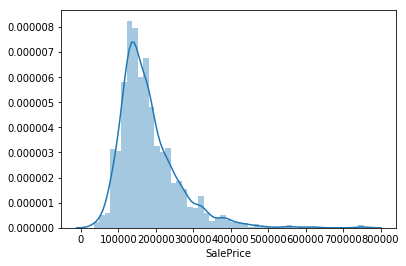

In [7]:
y=df['SalePrice']
sns.distplot(y)

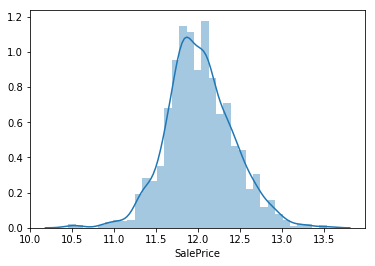

In [8]:
sns.distplot(np.log(y))

In [9]:
df['SalePrice']=np.log(df['SalePrice'])

In [10]:
df.dtypes

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
Alley             object
BedroomAbvGr       int64
BldgType          object
BsmtCond          object
BsmtExposure      object
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtFinType1      object
BsmtFinType2      object
BsmtFullBath       int64
BsmtHalfBath       int64
BsmtQual          object
BsmtUnfSF          int64
CentralAir        object
Condition1        object
Condition2        object
Electrical        object
EnclosedPorch      int64
ExterCond         object
ExterQual         object
Exterior1st       object
Exterior2nd       object
Fence             object
FireplaceQu       object
Fireplaces         int64
Foundation        object
FullBath           int64
                  ...   
LotShape          object
LowQualFinSF       int64
MSSubClass         int64
MSZoning          object
MasVnrArea       float64
MasVnrType        object
MiscFeature       object
MiscVal            int64
MoSold             int64


## Data Cleaning

### Checking NAs

In [11]:
null_cols=df.columns[df.isnull().any()]
df[null_cols].isnull().sum().sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageQual        81
GarageFinish      81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtFinType1      37
BsmtCond          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [12]:
dg=(df[null_cols].isnull().sum()/len(df)*100).sort_values(ascending=False)
dg

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtFinType1     2.534247
BsmtCond         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [13]:
featureName=dg.index.values
featureName

array(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage', 'GarageYrBlt', 'GarageType', 'GarageQual',
       'GarageFinish', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
       'BsmtQual', 'BsmtFinType1', 'BsmtCond', 'MasVnrArea', 'MasVnrType',
       'Electrical'], dtype=object)

In [14]:
def missingness(featureName):
    for i in featureName:
        print(i)
        print(df[i].value_counts(dropna=False))
        print("Value missing: %2.1f %%" % (df[i].isnull().sum()/len(df)*100))
        print()

### Checking unique values of feature with more than 70% missning values

In [15]:
missingness(featureName)

PoolQC
NaN    1453
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64
Value missing: 99.5 %

MiscFeature
NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64
Value missing: 96.3 %

Alley
NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
Value missing: 93.8 %

Fence
NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64
Value missing: 80.8 %

FireplaceQu
NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64
Value missing: 47.3 %

LotFrontage
NaN       259
 60.0     143
 70.0      70
 80.0      69
 50.0      57
 75.0      53
 65.0      44
 85.0      40
 78.0      25
 21.0      23
 90.0      23
 68.0      19
 24.0      19
 64.0      19
 73.0      18
 72.0      17
 79.0      17
 63.0      17
 55.0      17
 100.0     16
 51.0      15
 66.0      15
 74.0      15
 52.0      14
 59.0      13
 71.0      12
 67.0      12
 57.0      12
 82.0  

### Remove columns with more than 70% of missing values

In [16]:
df=df.drop(columns=['PoolQC','MiscFeature','Alley','Fence'])

In [17]:
df.shape

(1460, 76)

### Checking the rest of features with missing values

In [18]:
null_cols=df.columns[df.isnull().any()]
dg=(df[null_cols].isnull().sum()/len(df)*100).sort_values(ascending=False)
print(dg)
nullCol=dg.index.values
nullCol

FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtFinType1     2.534247
BsmtCond         2.534247
MasVnrType       0.547945
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


array(['FireplaceQu', 'LotFrontage', 'GarageYrBlt', 'GarageType',
       'GarageQual', 'GarageFinish', 'GarageCond', 'BsmtFinType2',
       'BsmtExposure', 'BsmtQual', 'BsmtFinType1', 'BsmtCond',
       'MasVnrType', 'MasVnrArea', 'Electrical'], dtype=object)

### It looks like "FireplaceQu" has "NaN" value when "Fireplaces" has "zero" value. 
### Let's check if the number of missing value in "FireplaceQu" is the same as the number of rows with zero value in "Fireplaces"

In [19]:
df['FireplaceQu'].isnull().sum()

690

In [20]:
len(df.loc[df['Fireplaces']==0])

690

### It turns out the number is the same. 
### We can go ahead and replace the "NaN" in "FireplaceQu" with "0"

### Also, we will change the datatype of "FireplaceQu" to a "Ordinal" Variable

### First we will need to replace "NaN" with "0" value

In [21]:
df['FireplaceQu'].fillna(0,inplace=True)

In [22]:
df['FireplaceQu'].value_counts()

0     690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

### Replace string values to ordinal value in "FireplaceQu"

In [23]:
#quality={'Po':1,'Fa':2,'TA':3,'Gd':4,"Ex":5}
df.FireplaceQu[df.FireplaceQu=='Po']=1
df.FireplaceQu[df.FireplaceQu=='Fa']=2
df.FireplaceQu[df.FireplaceQu=='TA']=3
df.FireplaceQu[df.FireplaceQu=='Gd']=4
df.FireplaceQu[df.FireplaceQu=='Ex']=5

In [24]:
df.FireplaceQu.dtypes

dtype('O')

### Let's change the datatype of "FireplaceQu" to "int"

In [25]:
df=df.astype({"FireplaceQu":int})

In [26]:
df.FireplaceQu.dtypes

dtype('int32')

In [27]:
df['LotFrontage'].isnull().sum()

259

### Some Lot just does not have LotFronage.
### Change "NaN" value to "zero" in "LotFrontage"

In [28]:
df['LotFrontage'].fillna(0,inplace=True)

### Check if the number of "0" value is the same as the number "NaN" value

In [29]:
df['LotFrontage'].value_counts()

0.0      259
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
67.0      12
57.0      12
82.0      12
43.0      12
        ... 
129.0      2
313.0      2
118.0      2
122.0      2
121.0      2
101.0      2
109.0      2
115.0      2
116.0      2
114.0      2
153.0      1
149.0      1
150.0      1
111.0      1
182.0      1
46.0       1
112.0      1
141.0      1
33.0       1
152.0      1
160.0      1
168.0      1
128.0      1
144.0      1
39.0       1
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

### Double check all the missing values again 

In [30]:
null_cols=df.columns[df.isnull().any()]
df[null_cols].isnull().sum().sort_values(ascending=False)
dg=(df[null_cols].isnull().sum()/len(df)*100).sort_values(ascending=False)
dg

GarageYrBlt     5.547945
GarageType      5.547945
GarageQual      5.547945
GarageFinish    5.547945
GarageCond      5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtQual        2.534247
BsmtFinType1    2.534247
BsmtCond        2.534247
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

### All the remaining variables have less than 6% of missing values.
### We will remove all the rows with any missing values.

In [31]:
df_miss=df.dropna()

In [32]:
df_miss.isnull().sum()

1stFlrSF         0
2ndFlrSF         0
3SsnPorch        0
BedroomAbvGr     0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtFinType1     0
BsmtFinType2     0
BsmtFullBath     0
BsmtHalfBath     0
BsmtQual         0
BsmtUnfSF        0
CentralAir       0
Condition1       0
Condition2       0
Electrical       0
EnclosedPorch    0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
FireplaceQu      0
Fireplaces       0
Foundation       0
FullBath         0
Functional       0
GarageArea       0
                ..
LotConfig        0
LotFrontage      0
LotShape         0
LowQualFinSF     0
MSSubClass       0
MSZoning         0
MasVnrArea       0
MasVnrType       0
MiscVal          0
MoSold           0
Neighborhood     0
OpenPorchSF      0
OverallCond      0
OverallQual      0
PavedDrive       0
PoolArea         0
RoofMatl         0
RoofStyle        0
SaleCondition    0
SalePrice        0
SaleType         0
ScreenPorch 

In [33]:
df_miss.shape

(1338, 76)

In [34]:
len(df)-len(df_miss)

122

### Checking the percentage of data removed

In [35]:
(len(df)-len(df_miss))/len(df)*100

8.356164383561644

## Start working on Outliers

## Convert all 'object' datatype variables to 'numerical" variables.

### First we need to convert "object" datatype to "categorical" datatype.

In [36]:
df_miss.select_dtypes(include=['object']).head()

,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Foundation,Functional,GarageCond,GarageFinish,GarageQual,GarageType,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,Neighborhood,PavedDrive,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,Reg,RL,BrkFace,CollgCr,Y,CompShg,Gable,Normal,WD,Pave,AllPub
1,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,SBrkr,TA,TA,MetalSd,MetalSd,CBlock,Typ,TA,RFn,TA,Attchd,GasA,Ex,1Story,TA,Lvl,Gtl,FR2,Reg,RL,None,Veenker,Y,CompShg,Gable,Normal,WD,Pave,AllPub
2,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,IR1,RL,BrkFace,CollgCr,Y,CompShg,Gable,Normal,WD,Pave,AllPub
3,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,SBrkr,TA,TA,Wd Sdng,Wd Shng,BrkTil,Typ,TA,Unf,TA,Detchd,GasA,Gd,2Story,Gd,Lvl,Gtl,Corner,IR1,RL,None,Crawfor,Y,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,FR2,IR1,RL,BrkFace,NoRidge,Y,CompShg,Gable,Normal,WD,Pave,AllPub


In [37]:
df_enc_col=list(df_miss.select_dtypes(include=['object']).columns.values)
df_enc_col

['BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'Neighborhood',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities']

In [38]:
df_enc=pd.DataFrame()
df_enc[df_enc_col]=df_miss[df_enc_col]
df_enc[df_enc_col].head()

,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Foundation,Functional,GarageCond,GarageFinish,GarageQual,GarageType,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,Neighborhood,PavedDrive,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,Reg,RL,BrkFace,CollgCr,Y,CompShg,Gable,Normal,WD,Pave,AllPub
1,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,SBrkr,TA,TA,MetalSd,MetalSd,CBlock,Typ,TA,RFn,TA,Attchd,GasA,Ex,1Story,TA,Lvl,Gtl,FR2,Reg,RL,None,Veenker,Y,CompShg,Gable,Normal,WD,Pave,AllPub
2,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,IR1,RL,BrkFace,CollgCr,Y,CompShg,Gable,Normal,WD,Pave,AllPub
3,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,SBrkr,TA,TA,Wd Sdng,Wd Shng,BrkTil,Typ,TA,Unf,TA,Detchd,GasA,Gd,2Story,Gd,Lvl,Gtl,Corner,IR1,RL,None,Crawfor,Y,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,FR2,IR1,RL,BrkFace,NoRidge,Y,CompShg,Gable,Normal,WD,Pave,AllPub


In [39]:
df_enc[df_enc_col]=df_enc[df_enc_col].astype('category',copy=True)

In [40]:
for item in df_enc_col:
    print(df_enc[item].dtypes)

category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category


### Then we need to convert "Category" variable to "Numerical" values with "Label Encoding" technique.

In [41]:
for item in df_enc_col:
    df_enc[item]=df_enc[item].cat.codes

In [42]:
df_enc[df_enc_col].head()

,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Foundation,Functional,GarageCond,GarageFinish,GarageQual,GarageType,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,Neighborhood,PavedDrive,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,0,3,3,2,5,2,1,2,2,4,3,2,11,13,2,6,4,1,4,1,0,0,5,2,3,0,4,3,3,1,5,2,1,1,4,8,1,0
1,0,3,1,0,5,2,1,1,2,4,3,3,7,8,1,6,4,1,4,1,0,0,2,3,3,0,2,3,3,2,24,2,1,1,4,8,1,0
2,0,3,2,2,5,2,1,2,2,4,3,2,11,13,2,6,4,1,4,1,0,0,5,2,3,0,4,0,3,1,5,2,1,1,4,8,1,0
3,0,1,3,0,5,3,1,2,2,4,3,3,12,15,0,6,4,2,4,5,0,2,5,2,3,0,0,0,3,2,6,2,1,1,0,8,1,0
4,0,3,0,2,5,2,1,2,2,4,3,2,11,13,2,6,4,1,4,1,0,0,5,2,3,0,2,0,3,1,15,2,1,1,4,8,1,0


### Combine encoded variables to original dataset

In [43]:
df_out=pd.DataFrame()
df_out=df_miss
df_out[df_enc_col]=df_enc[df_enc_col]
df_out.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,0,3,3,706,0,2,5,1,0,2,150,1,2,2,4,0,3,2,11,13,0,0,2,2,6,548,2,4,1,4,1,2003.0,1710,1,0,0,5,1,2,3,0,8450,4,65.0,3,0,60,3,196.0,1,0,2,5,61,5,7,2,0,1,1,4,12.247694,8,0,1,8,856,0,0,2003,2003,2008
1,1262,0,0,3,0,3,1,978,0,0,5,0,1,2,284,1,1,2,4,0,3,3,7,8,3,1,1,2,6,460,2,4,1,4,1,1976.0,1262,0,0,0,2,1,3,3,0,9600,2,80.0,3,0,20,3,0.0,2,0,5,24,0,8,6,2,0,1,1,4,12.109011,8,0,1,6,1262,0,298,1976,1976,2007
2,920,866,0,3,0,3,2,486,0,2,5,1,0,2,434,1,2,2,4,0,3,2,11,13,3,1,2,2,6,608,2,4,1,4,1,2001.0,1786,1,0,0,5,1,2,3,0,11250,4,68.0,0,0,60,3,162.0,1,0,9,5,42,5,7,2,0,1,1,4,12.317167,8,0,1,6,920,0,0,2001,2002,2008
3,961,756,0,3,0,1,3,216,0,0,5,1,0,3,540,1,2,2,4,272,3,3,12,15,4,1,0,1,6,642,3,4,2,4,5,1998.0,1717,0,0,2,5,1,2,3,0,9550,0,60.0,0,0,70,3,0.0,2,0,2,6,35,5,7,2,0,1,1,0,11.849398,8,0,1,7,756,0,0,1915,1970,2006
4,1145,1053,0,4,0,3,0,655,0,2,5,1,0,2,490,1,2,2,4,0,3,2,11,13,3,1,2,2,6,836,3,4,1,4,1,2000.0,2198,1,0,0,5,1,2,3,0,14260,2,84.0,0,0,60,3,350.0,1,0,12,15,84,5,8,2,0,1,1,4,12.429216,8,0,1,9,1145,0,192,2000,2000,2008


## Standardize all the continuous variables

In [44]:
scaler=StandardScaler()
array_out=scaler.fit_transform(df_out)

In [45]:
values=array_out
col=df_out.columns
df_out=pd.DataFrame(data=values,columns=col)

In [46]:
df_out.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,-0.828516,1.128813,-0.118688,0.174239,-0.395018,0.279034,0.650093,0.527157,-0.296255,-0.384924,0.31751,1.088949,-0.250577,-0.274488,-0.983421,0.218559,-0.059866,-0.036109,0.274964,-0.349612,0.341632,-0.741877,0.752602,0.754323,-1.071535,-1.005546,0.918767,0.775560,0.245509,0.249341,0.202747,0.190464,-0.216113,0.225742,-0.706793,0.985427,0.331321,1.184848,-0.113076,-0.858877,0.995207,-0.17119,-0.390085,0.308907,-0.228303,-0.218363,0.612488,0.203108,0.772893,-0.10374,0.093701,-0.038318,0.461582,-1.184869,-0.084535,-1.605319,-1.219747,0.202294,-0.553402,0.589337,0.243685,-0.071771,-0.125687,-0.503885,0.184105,0.488981,0.316441,-0.283203,0.061245,0.915080,-0.591875,-0.027349,-0.779554,1.014157,0.854216,0.146084
1,0.221935,-0.811389,-0.118688,0.174239,-0.395018,0.279034,-1.082625,1.120240,-0.296255,-1.485412,0.31751,-0.851149,3.888586,-0.274488,-0.678727,0.218559,-1.188047,-0.036109,0.274964,-0.349612,0.341632,0.688427,-0.538400,-0.674853,0.589137,0.544478,-0.569502,0.775560,0.245509,-0.222023,0.202747,0.190464,-0.216113,0.225742,-0.706793,-0.104844,-0.529579,-0.799291,-0.113076,-0.858877,-0.571980,-0.17119,0.815306,0.308907,-0.228303,-0.107067,-0.614322,0.629552,0.772893,-0.10374,-0.876298,-0.038318,-0.594820,0.394170,-0.084535,-0.493561,1.922891,-0.731311,2.230251,-0.165963,0.243685,-0.071771,-0.125687,-0.503885,0.184105,0.120834,0.316441,-0.283203,0.061245,-0.347165,0.409598,-0.027349,1.557895,0.100528,-0.476562,-0.605686
2,-0.662928,1.156076,-0.118688,0.174239,-0.395018,0.279034,-0.216266,0.047458,-0.296255,-0.384924,0.31751,1.088949,-0.250577,-0.274488,-0.337652,0.218559,-0.059866,-0.036109,0.274964,-0.349612,0.341632,-0.741877,0.752602,0.754323,0.589137,0.544478,0.918767,0.775560,0.245509,0.570726,0.202747,0.190464,-0.216113,0.225742,-0.706793,0.904666,0.477367,1.184848,-0.113076,-0.858877,0.995207,-0.17119,-0.390085,0.308907,-0.228303,0.052620,0.612488,0.288397,-1.341893,-0.10374,0.093701,-0.038318,0.278328,-1.184869,-0.084535,0.988784,-1.219747,-0.088501,-0.553402,0.589337,0.243685,-0.071771,-0.125687,-0.503885,0.184105,0.673401,0.316441,-0.283203,0.061245,-0.347165,-0.434007,-0.027349,-0.779554,0.946480,0.804928,0.146084
3,-0.556848,0.906167,-0.118688,0.174239,-0.395018,-2.845214,0.650093,-0.541263,-0.296255,-1.485412,0.31751,1.088949,-0.250577,0.866087,-0.096626,0.218559,-0.059866,-0.036109,0.274964,4.122511,0.341632,0.688427,1.075352,1.325993,1.142695,0.544478,-2.057772,-1.051375,0.245509,0.752844,1.779928,0.190464,1.014352,0.225742,1.544847,0.783525,0.344773,-0.799291,-0.113076,0.294337,0.995207,-0.17119,-0.390085,0.308907,-0.228303,-0.111906,-1.841132,0.060960,-1.341893,-0.10374,0.336201,-0.038318,-0.594820,0.394170,-0.084535,-1.605319,-1.054345,-0.195636,-0.553402,0.589337,0.243685,-0.071771,-0.125687,-0.503885,-3.591099,-0.568330,0.316441,-0.283203,0.061245,0.283958,-0.838543,-0.027349,-0.779554,-1.963596,-0.772291,-1.357457
4,-0.080781,1.580921,-0.118688,1.462256,-0.395018,0.279034,-1.948985,0.415954,-0.296255,-0.384924,0.31751,1.088949,-0.250577,-0.274488,-0.210318,0.218559,-0.059866,-0.036109,0.274964,-0.349612,0.341632,-0.741877,0.752602,0.754323,0.589137,0.544478,0.918767,0.775560,0.245509,1.791989,1.779

In [47]:
df_out['SalePrice'].isnull().sum()

0

In [48]:
df_out.describe().T

,count,mean,std,min,25%,50%,75%,max
1stFlrSF,1338.0,5.708770e-17,1.000374,-1.910016,-0.730198,-0.202385,0.615208,9.096439
2ndFlrSF,1338.0,-1.792288e-17,1.000374,-0.811389,-0.811389,-0.811389,0.870952,3.880083
3SsnPorch,1338.0,-1.593145e-17,1.000374,-0.118688,-0.118688,-0.118688,-0.118688,16.695086
BedroomAbvGr,1338.0,-2.655242e-17,1.000374,-3.689815,-1.113779,0.174239,0.174239,4.038292
BldgType,1338.0,-5.310484e-17,1.000374,-0.395018,-0.395018,-0.395018,-0.395018,2.908318
BsmtCond,1338.0,5.576008e-17,1.000374,-4.407338,0.279034,0.279034,0.279034,0.279034
BsmtExposure,1338.0,-1.579869e-16,1.000374,-1.948985,-1.082625,0.650093,0.650093,0.650093
BsmtFinSF1,1338.0,-5.044960e-17,1.000374,-1.012240,-1.012240,-0.111715,0.586029,11.294219
BsmtFinSF2,1338.0,-3.982863e-17,1.000374,-0.296255,-0.296255,-0.296255,-0.296255,8.576076
BsmtFinType1,1338.0,1.048821e-16,1.000374,-1.485412,-0.935168,-0.384924,1.265808,1.265808


(array([  2.,   6.,  32., 148., 438., 383., 216.,  89.,  18.,   6.]),
 array([-4.22487667, -3.41190514, -2.59893361, -1.78596208, -0.97299054,
        -0.16001901,  0.65295252,  1.46592405,  2.27889558,  3.09186711,
         3.90483864]),
 <a list of 10 Patch objects>)

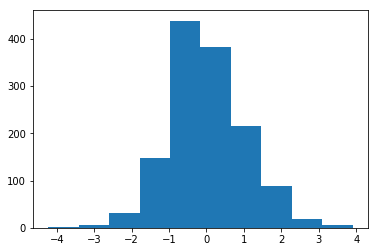

In [49]:
plt.hist(df_out['SalePrice'])

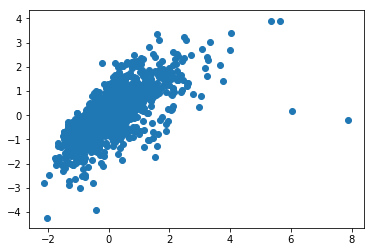

In [50]:
plt.scatter(x=df_out['GrLivArea'],y=df_out['SalePrice'])

## Feature Selection

### 1. Filter Method - Correlation Coefficient

In [51]:
corr=df_out.corr()
corr.sort_values(["SalePrice"],ascending=False,inplace=True)
dc=corr.SalePrice

In [52]:
dc

SalePrice        1.000000
OverallQual      0.807486
GrLivArea        0.704739
GarageCars       0.660141
GarageArea       0.612695
FullBath         0.612604
1stFlrSF         0.599786
TotalBsmtSF      0.589520
YearBuilt        0.572592
YearRemodAdd     0.565870
TotRmsAbvGrd     0.551437
GarageYrBlt      0.536262
FireplaceQu      0.527068
Foundation       0.497078
Fireplaces       0.470671
MasVnrArea       0.423314
OpenPorchSF      0.346072
BsmtFinSF1       0.342070
WoodDeckSF       0.317555
2ndFlrSF         0.308708
HalfBath         0.286409
CentralAir       0.278809
Electrical       0.263060
LotArea          0.250126
SaleCondition    0.238019
PavedDrive       0.224216
BsmtFullBath     0.215843
BedroomAbvGr     0.199379
BsmtUnfSF        0.194456
GarageCond       0.193368
                   ...   
3SsnPorch        0.053057
MoSold           0.051261
BsmtFinType2     0.048822
MasVnrType       0.015242
LandContour      0.014661
Condition2      -0.007270
MiscVal         -0.011226
Utilities   

In [53]:
dc.index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'FullBath', '1stFlrSF', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd',
       'TotRmsAbvGrd', 'GarageYrBlt', 'FireplaceQu', 'Foundation',
       'Fireplaces', 'MasVnrArea', 'OpenPorchSF', 'BsmtFinSF1', 'WoodDeckSF',
       '2ndFlrSF', 'HalfBath', 'CentralAir', 'Electrical', 'LotArea',
       'SaleCondition', 'PavedDrive', 'BsmtFullBath', 'BedroomAbvGr',
       'BsmtUnfSF', 'GarageCond', 'HouseStyle', 'RoofStyle', 'LotFrontage',
       'Neighborhood', 'GarageQual', 'Exterior2nd', 'Exterior1st', 'RoofMatl',
       'ExterCond', 'Functional', 'ScreenPorch', 'Condition1', 'BsmtCond',
       'PoolArea', 'Street', 'LandSlope', '3SsnPorch', 'MoSold',
       'BsmtFinType2', 'MasVnrType', 'LandContour', 'Condition2', 'MiscVal',
       'Utilities', 'BsmtFinSF2', 'LowQualFinSF', 'SaleType', 'BsmtHalfBath',
       'YrSold', 'Heating', 'BsmtFinType1', 'LotConfig', 'BldgType',
       'MSSubClass', 'OverallCond', 'KitchenA

In [54]:
dc.values

array([ 1.        ,  0.8074857 ,  0.70473894,  0.66014075,  0.61269452,
        0.61260389,  0.59978615,  0.58952025,  0.57259173,  0.56587019,
        0.55143677,  0.53626173,  0.52706753,  0.49707807,  0.47067112,
        0.42331423,  0.34607215,  0.34206958,  0.31755505,  0.30870754,
        0.28640944,  0.27880933,  0.26306047,  0.25012583,  0.23801919,
        0.22421613,  0.21584274,  0.19937875,  0.19445612,  0.19336785,
        0.19233836,  0.18918721,  0.18547878,  0.18520042,  0.1666701 ,
        0.13568563,  0.12252142,  0.12243645,  0.1199445 ,  0.11653865,
        0.1050095 ,  0.09967171,  0.08082215,  0.0697885 ,  0.06488613,
        0.06063344,  0.05305697,  0.05126082,  0.04882155,  0.01524152,
        0.01466129, -0.00727027, -0.01122649, -0.01685112, -0.02050253,
       -0.023653  , -0.02378422, -0.02487607, -0.0282392 , -0.06659585,
       -0.06889598, -0.07045565, -0.07224064, -0.07290122, -0.08127469,
       -0.12232653, -0.15235139, -0.19059199, -0.28329463, -0.28

In [55]:
dc.index.values

array(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars',
       'GarageArea', 'FullBath', '1stFlrSF', 'TotalBsmtSF', 'YearBuilt',
       'YearRemodAdd', 'TotRmsAbvGrd', 'GarageYrBlt', 'FireplaceQu',
       'Foundation', 'Fireplaces', 'MasVnrArea', 'OpenPorchSF',
       'BsmtFinSF1', 'WoodDeckSF', '2ndFlrSF', 'HalfBath', 'CentralAir',
       'Electrical', 'LotArea', 'SaleCondition', 'PavedDrive',
       'BsmtFullBath', 'BedroomAbvGr', 'BsmtUnfSF', 'GarageCond',
       'HouseStyle', 'RoofStyle', 'LotFrontage', 'Neighborhood',
       'GarageQual', 'Exterior2nd', 'Exterior1st', 'RoofMatl',
       'ExterCond', 'Functional', 'ScreenPorch', 'Condition1', 'BsmtCond',
       'PoolArea', 'Street', 'LandSlope', '3SsnPorch', 'MoSold',
       'BsmtFinType2', 'MasVnrType', 'LandContour', 'Condition2',
       'MiscVal', 'Utilities', 'BsmtFinSF2', 'LowQualFinSF', 'SaleType',
       'BsmtHalfBath', 'YrSold', 'Heating', 'BsmtFinType1', 'LotConfig',
       'BldgType', 'MSSubClass', 'OverallCond', 'K

In [56]:
dc_new=dc[(dc.values>0.5)&(dc.values<1)]
dc_new

OverallQual     0.807486
GrLivArea       0.704739
GarageCars      0.660141
GarageArea      0.612695
FullBath        0.612604
1stFlrSF        0.599786
TotalBsmtSF     0.589520
YearBuilt       0.572592
YearRemodAdd    0.565870
TotRmsAbvGrd    0.551437
GarageYrBlt     0.536262
FireplaceQu     0.527068
Name: SalePrice, dtype: float64

In [57]:
feature_col=dc_new.index.values
feature_col

array(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'FullBath',
       '1stFlrSF', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd',
       'TotRmsAbvGrd', 'GarageYrBlt', 'FireplaceQu'], dtype=object)

### Select the features to be used in the data analysis

In [58]:
X=df_out[sorted(feature_col)]
y=df_out['SalePrice']

In [59]:
X.head()

,1stFlrSF,FireplaceQu,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,OverallQual,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YearRemodAdd
0,-0.828516,-1.071535,0.775560,0.249341,0.202747,0.985427,0.331321,0.589337,0.915080,-0.591875,1.014157,0.854216
1,0.221935,0.589137,0.775560,-0.222023,0.202747,-0.104844,-0.529579,-0.165963,-0.347165,0.409598,0.100528,-0.476562
2,-0.662928,0.589137,0.775560,0.570726,0.202747,0.904666,0.477367,0.589337,-0.347165,-0.434007,0.946480,0.804928
3,-0.556848,1.142695,-1.051375,0.752844,1.779928,0.783525,0.344773,0.589337,0.283958,-0.838543,-1.963596,-0.772291
4,-0.080781,0.589137,0.775560,1.791989,1.779928,0.864286,1.269088,1.344638,1.546203,0.120996,0.912642,0.706352


In [60]:
y.head()

0    0.488981
1    0.120834
2    0.673401
3   -0.568330
4    0.970845
Name: SalePrice, dtype: float64

### Pair Plot

In [61]:
df_pair=X
df_pair['SalePrice']=y

In [62]:
df_pair.head()

,1stFlrSF,FireplaceQu,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,OverallQual,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,-0.828516,-1.071535,0.775560,0.249341,0.202747,0.985427,0.331321,0.589337,0.915080,-0.591875,1.014157,0.854216,0.488981
1,0.221935,0.589137,0.775560,-0.222023,0.202747,-0.104844,-0.529579,-0.165963,-0.347165,0.409598,0.100528,-0.476562,0.120834
2,-0.662928,0.589137,0.775560,0.570726,0.202747,0.904666,0.477367,0.589337,-0.347165,-0.434007,0.946480,0.804928,0.673401
3,-0.556848,1.142695,-1.051375,0.752844,1.779928,0.783525,0.344773,0.589337,0.283958,-0.838543,-1.963596,-0.772291,-0.568330
4,-0.080781,0.589137,0.775560,1.791989,1.779928,0.864286,1.269088,1.344638,1.546203,0.120996,0.912642,0.706352,0.970845


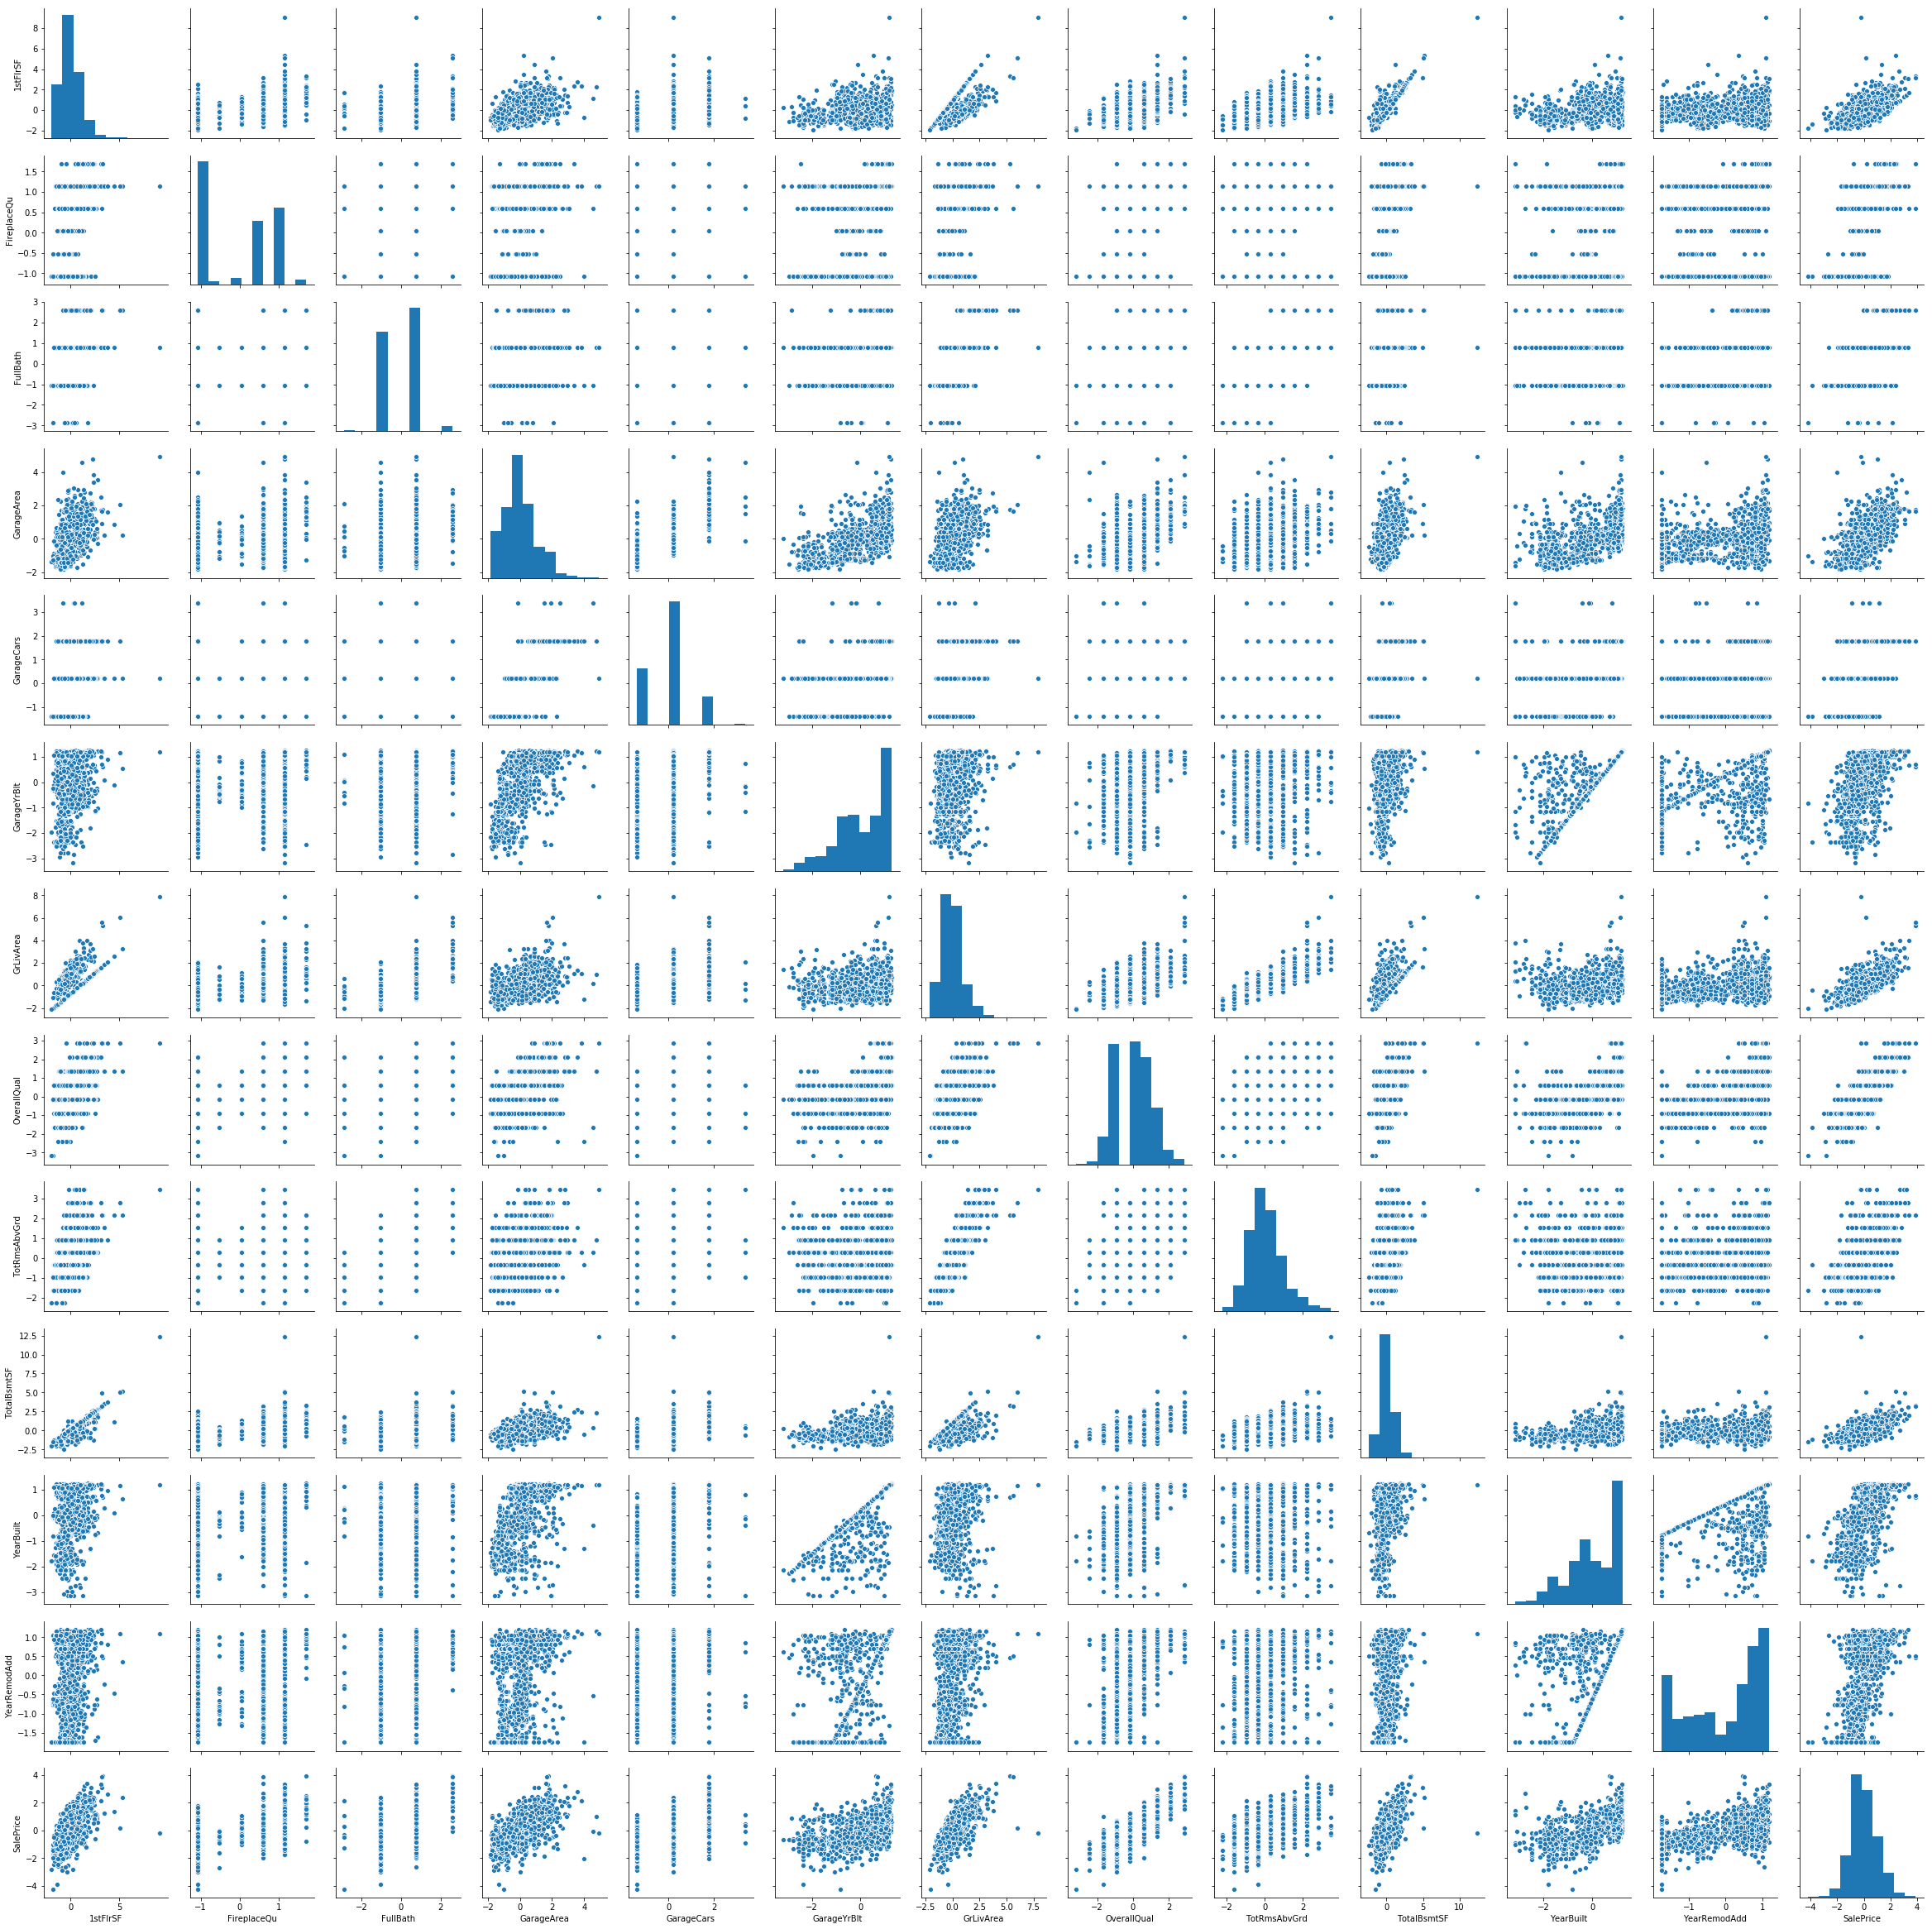

In [63]:
sns.pairplot(df_pair)

### Scatter Plot

In [64]:
list(feature_col)

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'FullBath',
 '1stFlrSF',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'FireplaceQu']

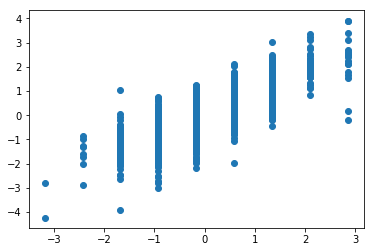

In [65]:
plt.scatter(x=df_out['OverallQual'],y=df_out['SalePrice'])

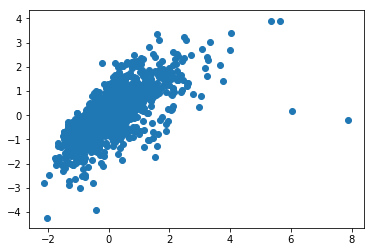

In [66]:
plt.scatter(x=df_out['GrLivArea'],y=df_out['SalePrice'])

In [67]:
df_out=df_out.drop(df_out[df_out['GrLivArea']>5].index)

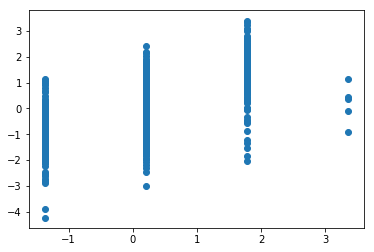

In [68]:
plt.scatter(x=df_out['GarageCars'],y=df_out['SalePrice'])

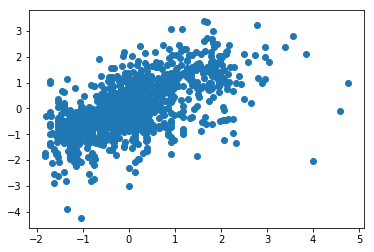

In [69]:
plt.scatter(x=df_out['GarageArea'],y=df_out['SalePrice'])

In [70]:
df_out=df_out.drop(df_out[(df_out['GarageArea']>4)&(df_out['SalePrice']<2)].index)

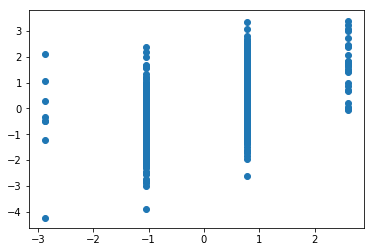

In [71]:
plt.scatter(x=df_out['FullBath'],y=df_out['SalePrice'])

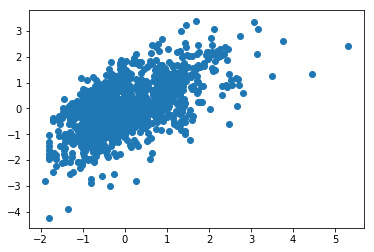

In [72]:
plt.scatter(x=df_out['1stFlrSF'],y=df_out['SalePrice'])

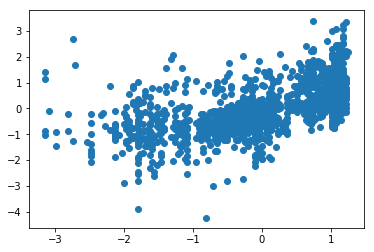

In [73]:
plt.scatter(x=df_out['YearBuilt'],y=df_out['SalePrice'])

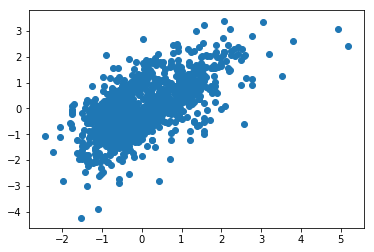

In [74]:
plt.scatter(x=df_out['TotalBsmtSF'],y=df_out['SalePrice'])

In [75]:
df_out=df_out.drop(df_out[df_out['TotalBsmtSF']>5].index)

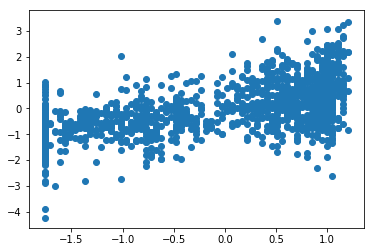

In [76]:
plt.scatter(x=df_out['YearRemodAdd'],y=df_out['SalePrice'])

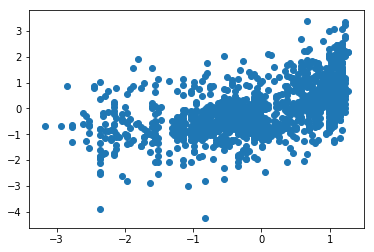

In [77]:
plt.scatter(x=df_out['GarageYrBlt'],y=df_out['SalePrice'])

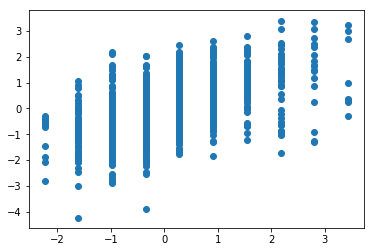

In [78]:
plt.scatter(x=df_out['TotRmsAbvGrd'],y=df_out['SalePrice'])

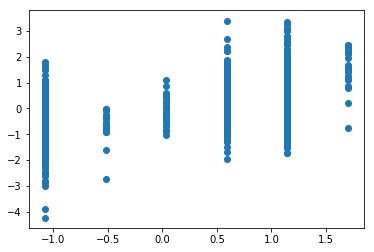

In [79]:
plt.scatter(x=df_out['FireplaceQu'],y=df_out['SalePrice'])

## Modeling

### Specify testing size

In [80]:
TS=0.2

### Create a Result dataframe

In [81]:
result_col=['Algorithm','Correlation','Recursive','XGBoost']
result=pd.DataFrame(columns=result_col)
result['Algorithm']=['Ridge Regression','LASSO Regression','Elastic Net',
                     'Decision Tree','Random Forest','XGBoost']

In [82]:
result

,Algorithm,Correlation,Recursive,XGBoost
0,Ridge Regression,NaN,NaN,NaN
1,LASSO Regression,NaN,NaN,NaN
2,Elastic Net,NaN,NaN,NaN
3,Decision Tree,NaN,NaN,NaN
4,Random Forest,NaN,NaN,NaN
5,XGBoost,NaN,NaN,NaN


### Split the data to train and test dataset

In [83]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=TS, random_state=200)

### Ridge Regression

In [84]:
print(plt.rcParams["figure.figsize"])
plt.rcParams["figure.figsize"] = (8,4)

[6.0, 4.0]


In [85]:
from sklearn.linear_model import Ridge
RR=Ridge(alpha=0.001,fit_intercept=True)
RR_fit=RR.fit(x_train,y_train)

In [86]:
y_pred=RR_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

2.1620353003689844e-06

2.1112972083209e-06

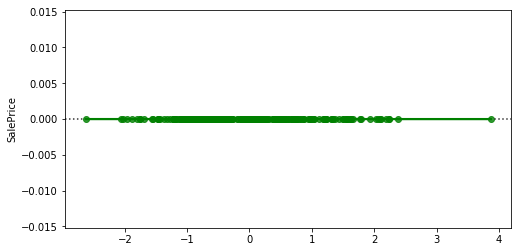

In [87]:
y_pred=RR_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['Correlation'][0]=np.sqrt(mean_squared_error(y_pred,y_test))
result['Correlation'][0]

### Lasso Regression

In [88]:
from sklearn.linear_model import Lasso
LR=Lasso(alpha=0.001,fit_intercept=True)
LR_fit=LR.fit(x_train,y_train)
y_pred=LR_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.0009922783983377344

0.0009537807416355258

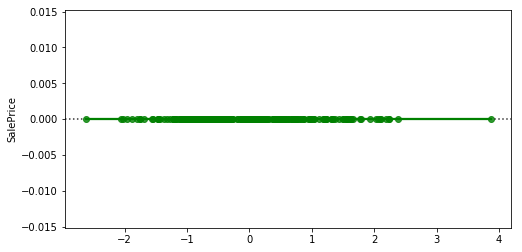

In [89]:
y_pred=LR_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['Correlation'][1]=np.sqrt(mean_squared_error(y_pred,y_test))
result['Correlation'][1]

### Elastic Net Model

In [90]:
from sklearn.linear_model import ElasticNetCV
EN = ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], 
                       l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000)
EN_fit=EN.fit(x_train, y_train)

In [91]:
y_pred=EN_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

9.922774213112046e-05

9.537798025149062e-05

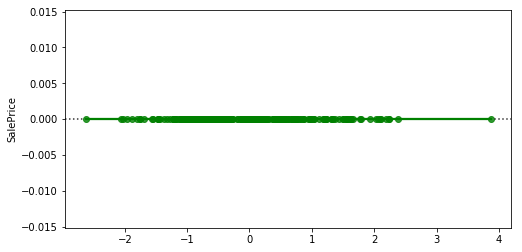

In [92]:
y_pred=EN_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['Correlation'][2]=np.sqrt(mean_squared_error(y_pred,y_test))
result['Correlation'][2]

### Decision Tree Model

In [93]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()
DT_fit=DT.fit(x_train,y_train)

In [94]:
y_pred=DT_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

3.926021155082747e-05

0.031712251269403996

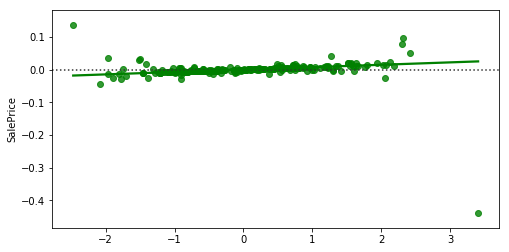

In [95]:
y_pred=DT_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['Correlation'][3]=np.sqrt(mean_squared_error(y_pred,y_test))
result['Correlation'][3]

### Random Forest Model

In [96]:
RF = ensemble.RandomForestRegressor(n_estimators=100, random_state=0)
RF_fit=RF.fit(x_train, y_train)

In [97]:
y_pred=RF_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.01892216422486407

0.0265703636900056

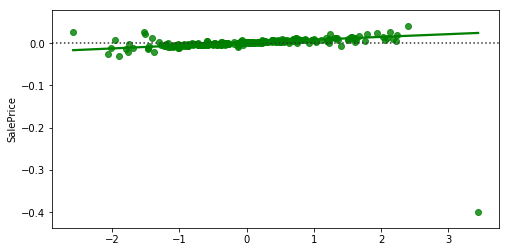

In [98]:
y_pred=RF_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['Correlation'][4]=np.sqrt(mean_squared_error(y_pred,y_test))
result['Correlation'][4]

### XGBoost Model

In [99]:
XG = ensemble.GradientBoostingRegressor(loss='huber', learning_rate=0.05, n_estimators=3000, max_depth=10, 
                                  max_features='sqrt', min_samples_leaf=15, 
                                  min_samples_split=10)
XG_fit=XG.fit(x_train, y_train)

In [100]:
y_pred=XG_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.07919573989222024

0.1381925357524578

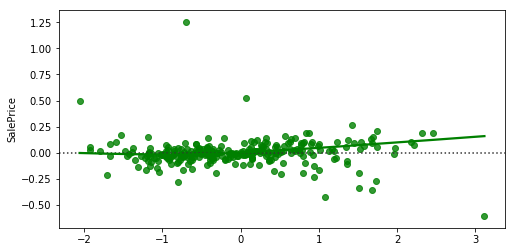

In [101]:
y_pred=XG_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['Correlation'][5]=np.sqrt(mean_squared_error(y_pred,y_test))
result['Correlation'][5]

### Wrapper Method - Recursive Feature Elimination Method

In [102]:
from sklearn.feature_selection import RFECV

### Split the data to train and test dataset

In [103]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=TS, random_state=200)

### Ridge Regression

In [104]:
RR=Ridge(alpha=0.001,fit_intercept=True)
RM_RR=RFECV(RR, step=1, cv=20, scoring='neg_mean_squared_error')
RM_RR_fit=RM_RR.fit(x_train,y_train)
RM_RR_fit.n_features_

1

In [105]:
y_pred=RM_RR_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

9.273621358518848e-07

8.913830505403256e-07

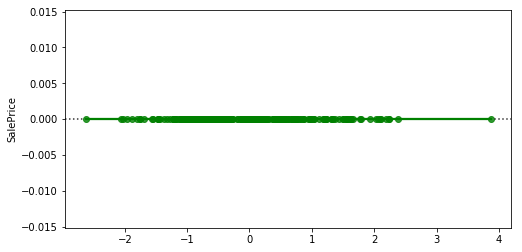

In [106]:
y_pred=RM_RR_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['Recursive'][0]=np.sqrt(mean_squared_error(y_pred,y_test))
result['Recursive'][0]

### Lasso Regression

In [107]:
LR=Lasso(alpha=0.001,fit_intercept=True)
RM_LR=RFECV(LR, step=1, cv=20, scoring='neg_mean_squared_error')
RM_LR_fit=RM_LR.fit(x_train,y_train)
RM_LR_fit.n_features_

10

In [108]:
y_pred=RM_LR_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.0009922783983377344

0.0009537807416355258

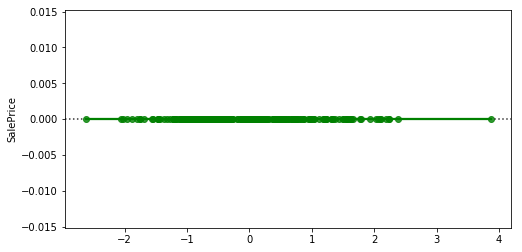

In [109]:
y_pred=RM_LR_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['Recursive'][1]=np.sqrt(mean_squared_error(y_pred,y_test))
result['Recursive'][1]

### Elastic Net Model

In [110]:
EN = ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], 
                       l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000)
RM_EN=RFECV(EN, step=1, cv=20, scoring='neg_mean_squared_error')
RM_EN_fit=RM_EN.fit(x_train,y_train)
RM_EN_fit.n_features_

6

In [111]:
y_pred=RM_EN_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

9.922774213112046e-05

9.537798025149062e-05

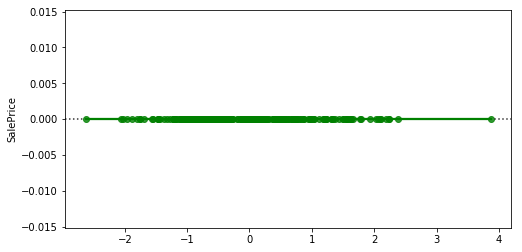

In [112]:
y_pred=RM_EN_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['Recursive'][2]=np.sqrt(mean_squared_error(y_pred,y_test))
result['Recursive'][2]

### Decision Tree Model

In [113]:
DT=DecisionTreeRegressor()
RM_DT=RFECV(DT, step=1, cv=20, scoring='neg_mean_squared_error')
RM_DT_fit=RM_DT.fit(x_train,y_train)
RM_DT_fit.n_features_

1

In [114]:
y_pred=RM_DT_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

3.926021155082747e-05

0.006983213887691913

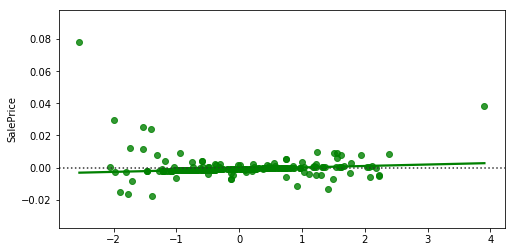

In [115]:
y_pred=RM_DT_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['Recursive'][3]=np.sqrt(mean_squared_error(y_pred,y_test))
result['Recursive'][3]

### Random Forest Model

In [116]:
RF = ensemble.RandomForestRegressor(n_estimators=100, random_state=0)
RM_RF=RFECV(RF, step=1, cv=10, scoring='neg_mean_squared_error')
RM_RF_fit=RM_RF.fit(x_train,y_train)
RM_RF_fit.n_features_

1

In [117]:
y_pred=RM_RF_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.010676470611997425

0.014137014437900658

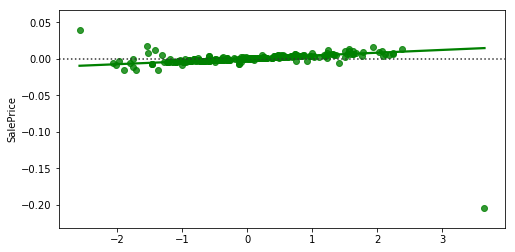

In [118]:
y_pred=RM_RF_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['Recursive'][4]=np.sqrt(mean_squared_error(y_pred,y_test))
result['Recursive'][4]

### XGBoost Model

In [119]:
XG = ensemble.GradientBoostingRegressor(loss='huber', learning_rate=0.05, n_estimators=300, max_depth=10, 
                                  max_features='sqrt', min_samples_leaf=15, 
                                  min_samples_split=10)
RM_XG=RFECV(XG, step=1, cv=5, scoring='neg_mean_squared_error')
RM_XG_fit=RM_XG.fit(x_train,y_train)
RM_XG_fit.n_features_

1

In [120]:
y_pred=RM_XG_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.09070810558494309

0.07012600394022607

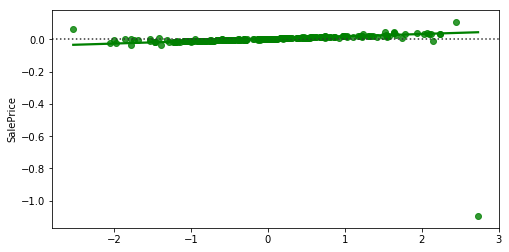

In [121]:
y_pred=RM_XG_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['Recursive'][5]=np.sqrt(mean_squared_error(y_pred,y_test))
result['Recursive'][5]

## Embedded Method - XGBoost Feature Importance

In [122]:
from xgboost import XGBClassifier
model = XGBClassifier()
df_out_X=df_out.drop(columns=['SalePrice'])
df_out_y=df_out['SalePrice']
model.fit(df_out_X, df_out_y)
print(model.feature_importances_)

[0.0647818  0.03427871 0.00047471 0.00387498 0.00089423 0.00057407
 0.00691094 0.05878716 0.00221901 0.00907475 0.00048575 0.00259436
 0.00055199 0.00263852 0.08947793 0.00037535 0.0014131  0.
 0.0012475  0.00325675 0.0014683  0.00184365 0.00739669 0.0109736
 0.00779413 0.00107086 0.00202029 0.002495   0.00112606 0.06753072
 0.00134686 0.00060719 0.00710966 0.00023184 0.00492377 0.02182577
 0.0921606  0.00250604 0.         0.00892019 0.00410682 0.
 0.00410682 0.00076175 0.00041951 0.09705126 0.00545368 0.03351696
 0.00645831 0.         0.00739669 0.00181053 0.03690619 0.00313532
 0.00043055 0.02151665 0.01914309 0.03785562 0.00523289 0.00916307
 0.00043055 0.         0.00019872 0.00243981 0.00137998 0.00098255
 0.00149038 0.         0.0081474  0.06133737 0.         0.03585741
 0.02192513 0.02969718 0.01438492]


In [123]:
len(model.feature_importances_)

75

In [124]:
df_out_X.shape

(1331, 75)

In [125]:
df_out_X_col=df_out_X.columns.values

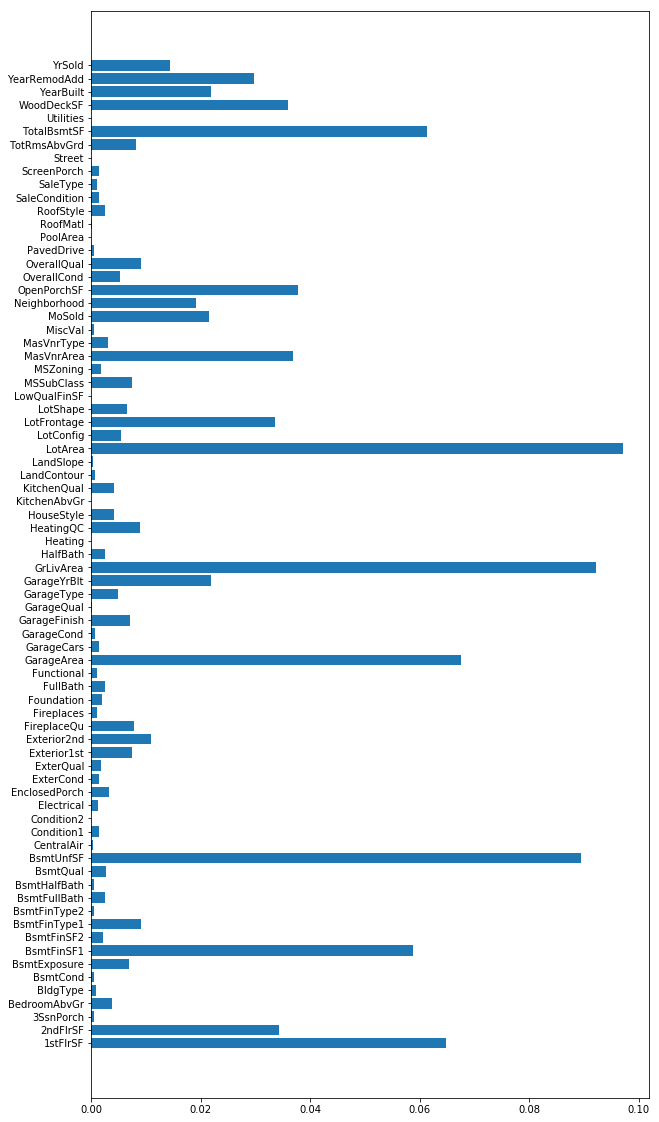

In [126]:
plt.rcParams["figure.figsize"] = (10,20)
plt.barh(df_out_X_col, model.feature_importances_)
plt.show()

In [127]:
df_XG=pd.DataFrame()

In [128]:
df_XG['Feature']=df_out_X_col
df_XG['Feature_Importance']=model.feature_importances_

In [129]:
df_XG.head()

,Feature,Feature_Importance
0,1stFlrSF,0.064782
1,2ndFlrSF,0.034279
2,3SsnPorch,0.000475
3,BedroomAbvGr,0.003875
4,BldgType,0.000894


In [130]:
df_XG=df_XG.sort_values(by=['Feature_Importance'],ascending=False)

In [131]:
df_XG

,Feature,Feature_Importance
45,LotArea,0.097051
36,GrLivArea,0.092161
14,BsmtUnfSF,0.089478
29,GarageArea,0.067531
0,1stFlrSF,0.064782
69,TotalBsmtSF,0.061337
7,BsmtFinSF1,0.058787
57,OpenPorchSF,0.037856
52,MasVnrArea,0.036906
71,WoodDeckSF,0.035857


In [132]:
feature_col_XG=df_XG['Feature'][:12].values

In [133]:
feature_col_XG

array(['LotArea', 'GrLivArea', 'BsmtUnfSF', 'GarageArea', '1stFlrSF',
       'TotalBsmtSF', 'BsmtFinSF1', 'OpenPorchSF', 'MasVnrArea',
       'WoodDeckSF', '2ndFlrSF', 'LotFrontage'], dtype=object)

### Using the new selected features in the 6 models again.

In [134]:
X=df_out[feature_col_XG]
y=df_out['SalePrice']

In [135]:
feature_col_XG

array(['LotArea', 'GrLivArea', 'BsmtUnfSF', 'GarageArea', '1stFlrSF',
       'TotalBsmtSF', 'BsmtFinSF1', 'OpenPorchSF', 'MasVnrArea',
       'WoodDeckSF', '2ndFlrSF', 'LotFrontage'], dtype=object)

### Split the data to train and test dataset

In [136]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=TS, random_state=200)

### Ridge Regression

In [137]:
plt.rcParams["figure.figsize"] = (8,4)

In [138]:
from sklearn.linear_model import Ridge
RR=Ridge(alpha=0.0001,fit_intercept=True)
RR_fit=RR.fit(x_train,y_train)
y_pred=RR_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.5119178690898545

0.4812512219931399

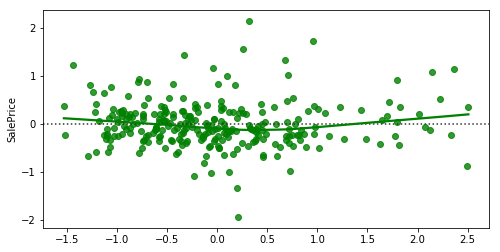

In [139]:
y_pred=RR_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['XGBoost'][0]=np.sqrt(mean_squared_error(y_pred,y_test))
result['XGBoost'][0]

### Lasso Regression

In [140]:
from sklearn.linear_model import Lasso
LR=Lasso(alpha=0.0001,fit_intercept=True)
LR_fit=LR.fit(x_train,y_train)
y_pred=LR_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.5119270009714599

0.4812061301358287

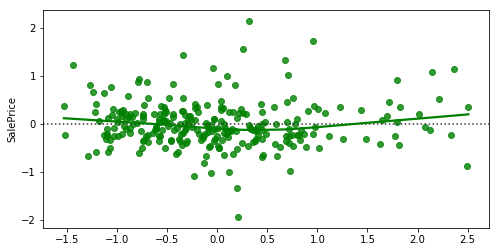

In [141]:
y_pred=LR_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['XGBoost'][1]=np.sqrt(mean_squared_error(y_pred,y_test))
result['XGBoost'][1]

### Elastic Net Model

In [142]:
from sklearn.linear_model import ElasticNetCV
EN = ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], 
                       l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000)
EN_fit=EN.fit(x_train, y_train)

In [143]:
y_pred=EN_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.5122238114471643

0.4810601416676527

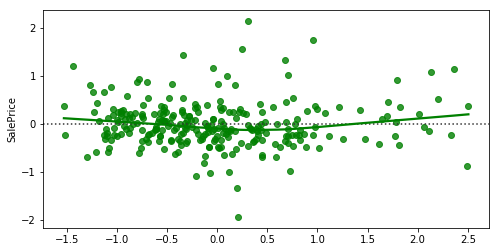

In [144]:
y_pred=EN_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['XGBoost'][2]=np.sqrt(mean_squared_error(y_pred,y_test))
result['XGBoost'][2]

### Decision Tree Model

In [145]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()
DT_fit=DT.fit(x_train,y_train)

In [146]:
y_pred=DT_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.003669038611254034

0.6803017758094145

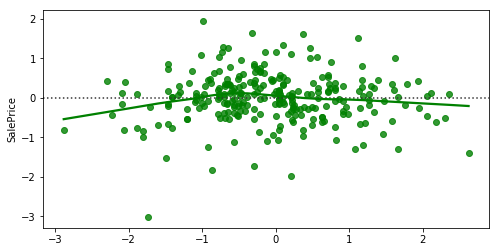

In [147]:
y_pred=DT_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['XGBoost'][3]=np.sqrt(mean_squared_error(y_pred,y_test))
result['XGBoost'][3]

### Random Forest Model

In [148]:
RF = ensemble.RandomForestRegressor(n_estimators=100, random_state=0)
RF_fit=RF.fit(x_train, y_train)

In [149]:
y_pred=RF_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.18247539999893073

0.4511789516103274

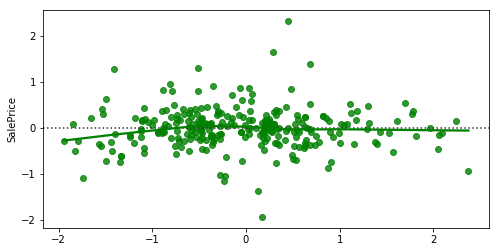

In [150]:
y_pred=RF_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['XGBoost'][4]=np.sqrt(mean_squared_error(y_pred,y_test))
result['XGBoost'][4]

### XGBoost Model

In [151]:
XG = ensemble.GradientBoostingRegressor(loss='huber', learning_rate=0.05, n_estimators=3000, max_depth=10, 
                                  max_features='sqrt', min_samples_leaf=15, 
                                  min_samples_split=10)
XG_fit=XG.fit(x_train, y_train)

In [152]:
y_pred=XG_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.13679380263948682

0.4346530059191957

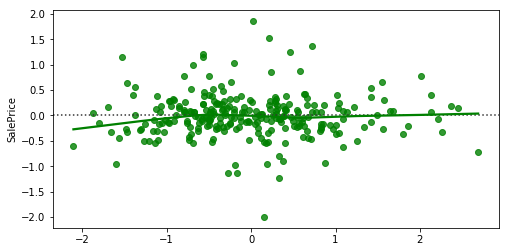

In [153]:
y_pred=XG_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['XGBoost'][5]=np.sqrt(mean_squared_error(y_pred,y_test))
result['XGBoost'][5]

## Examine the result

In [154]:
print('test-size: ',TS)

test-size:  0.2


In [155]:
result

,Algorithm,Correlation,Recursive,XGBoost
0,Ridge Regression,2.1113e-06,8.91383e-07,0.481251
1,LASSO Regression,0.000953781,0.000953781,0.481206
2,Elastic Net,9.5378e-05,9.5378e-05,0.48106
3,Decision Tree,0.0317123,0.00698321,0.680302
4,Random Forest,0.0265704,0.014137,0.451179
5,XGBoost,0.138193,0.070126,0.434653
